Human Stress Detection


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.simplefilter("ignore")

In [31]:
df=pd.read_csv("/home/vaishnavsk/Downloads/stress_detection.csv")
df.head()

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


In [32]:
print(df.columns)

Index(['participant_id', 'day', 'PSS_score', 'Openness', 'Conscientiousness',
       'Extraversion', 'Agreeableness', 'Neuroticism', 'sleep_time',
       'wake_time', 'sleep_duration', 'PSQI_score', 'call_duration',
       'num_calls', 'num_sms', 'screen_on_time', 'skin_conductance',
       'accelerometer', 'mobility_radius', 'mobility_distance'],
      dtype='object')


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   participant_id     3000 non-null   int64  
 1   day                3000 non-null   int64  
 2   PSS_score          3000 non-null   int64  
 3   Openness           3000 non-null   float64
 4   Conscientiousness  3000 non-null   float64
 5   Extraversion       3000 non-null   float64
 6   Agreeableness      3000 non-null   float64
 7   Neuroticism        3000 non-null   float64
 8   sleep_time         3000 non-null   float64
 9   wake_time          3000 non-null   float64
 10  sleep_duration     3000 non-null   float64
 11  PSQI_score         3000 non-null   int64  
 12  call_duration      3000 non-null   float64
 13  num_calls          3000 non-null   int64  
 14  num_sms            3000 non-null   int64  
 15  screen_on_time     3000 non-null   float64
 16  skin_conductance   3000 

In [34]:
df.isnull().sum()

participant_id       0
day                  0
PSS_score            0
Openness             0
Conscientiousness    0
Extraversion         0
Agreeableness        0
Neuroticism          0
sleep_time           0
wake_time            0
sleep_duration       0
PSQI_score           0
call_duration        0
num_calls            0
num_sms              0
screen_on_time       0
skin_conductance     0
accelerometer        0
mobility_radius      0
mobility_distance    0
dtype: int64

In [35]:
#no null values threefore no need to hande missing values


stress_level
High        1342
Moderate    1280
Low          378
Name: count, dtype: int64


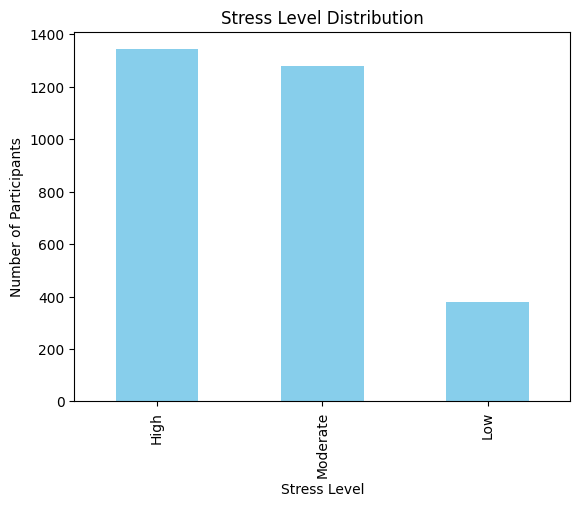

In [36]:
#Create Stress Level Category
def stress_category(score):
    if score <= 13:
        return 'Low'
    elif 14 <= score <= 26:
        return 'Moderate'
    else:
        return 'High'

#stress level distribution
df['stress_level'] = df['PSS_score'].apply(stress_category)

# Optional: check the distribution
print(df['stress_level'].value_counts())
df['stress_level'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Number of Participants')
plt.show()



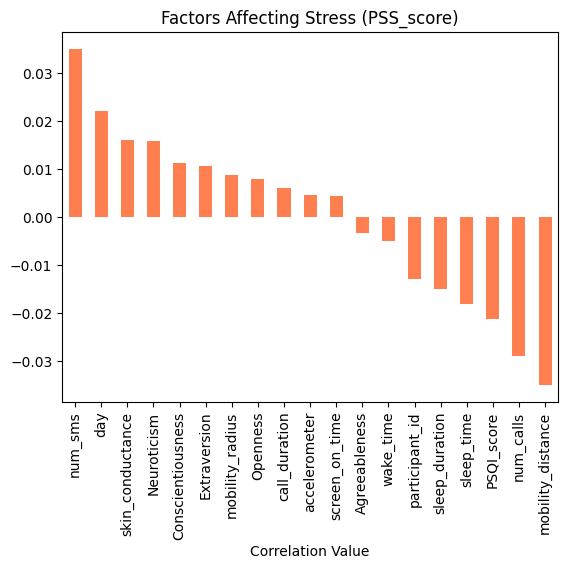

In [37]:
# Correlation between numerical features and stress score
correlation = df.corr(numeric_only=True)['PSS_score'].sort_values(ascending=False)

# Dropping the self-correlation
correlation.drop('PSS_score').plot(kind='bar', color='coral')
plt.title("Factors Affecting Stress (PSS_score)")
plt.xlabel("Correlation Value")
plt.show()


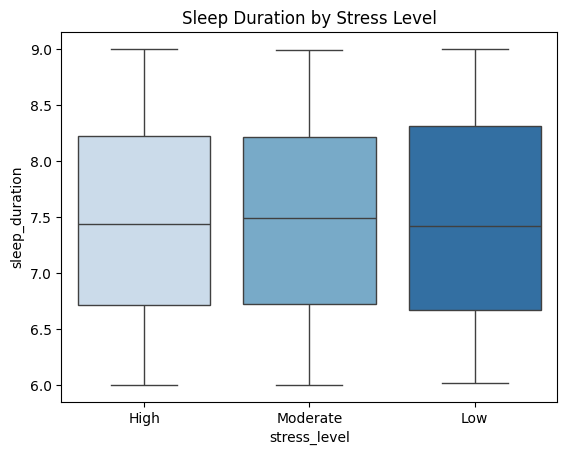

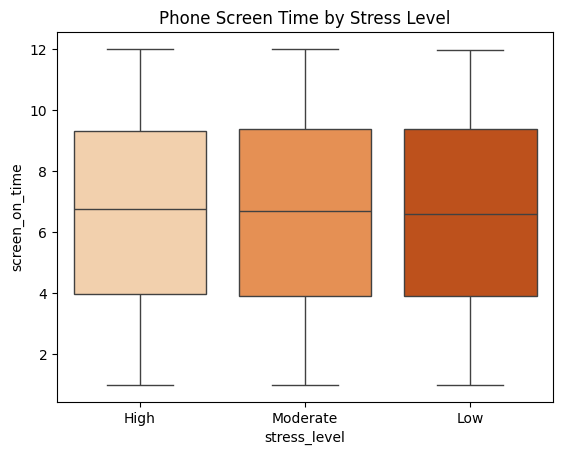

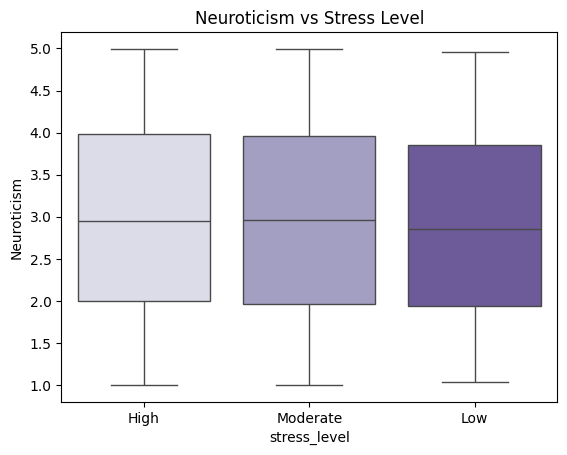

In [38]:
# Sleep Duration by Stress Level
sns.boxplot(data=df, x='stress_level', y='sleep_duration', palette='Blues')
plt.title('Sleep Duration by Stress Level')
plt.show()

# Screen On Time by Stress Level
sns.boxplot(data=df, x='stress_level', y='screen_on_time', palette='Oranges')
plt.title('Phone Screen Time by Stress Level')
plt.show()

# Neuroticism Score by Stress Level
sns.boxplot(data=df, x='stress_level', y='Neuroticism', palette='Purples')
plt.title('Neuroticism vs Stress Level')
plt.show()


In [39]:
#dropping unused columns
X = df.drop(['participant_id', 'day', 'PSS_score', 'stress_level'], axis=1)  
X = pd.get_dummies(X)  # Encode categorical/labeled columns if any
y = df['stress_level']  # Target variable


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
y_pred = model.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.4766666666666667

 Classification Report:
               precision    recall  f1-score   support

        High       0.49      0.61      0.54       272
         Low       0.00      0.00      0.00        74
    Moderate       0.45      0.48      0.47       254

    accuracy                           0.48       600
   macro avg       0.32      0.36      0.34       600
weighted avg       0.42      0.48      0.44       600



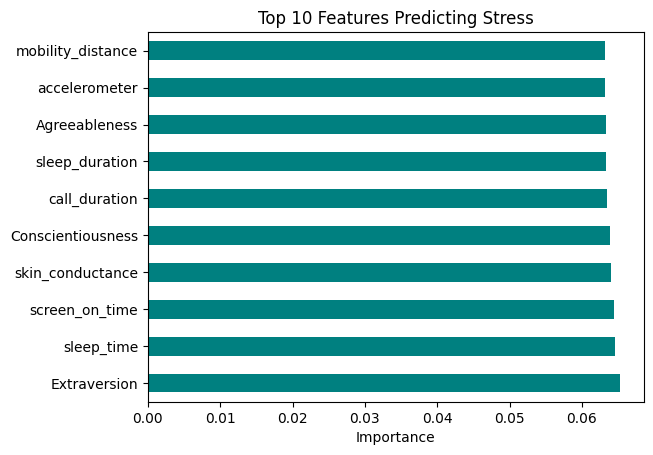

In [43]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Features Predicting Stress")
plt.xlabel("Importance")
plt.show()


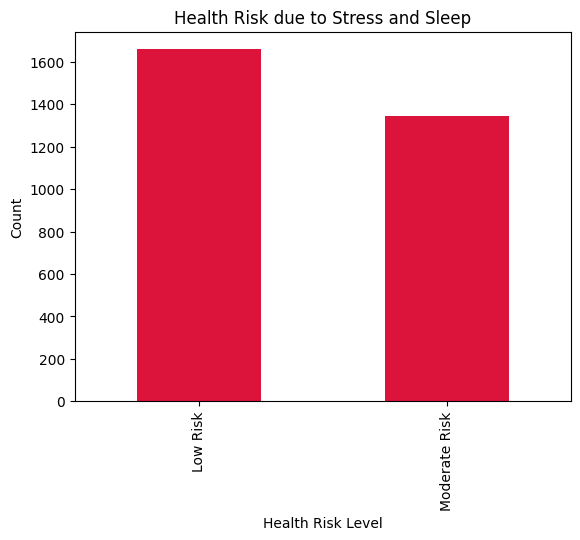

In [44]:
def health_risk(row):
    if row['stress_level'] == 'High' and row['sleep_duration'] < 5:
        return 'High Risk'
    elif row['stress_level'] == 'High':
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['health_risk'] = df.apply(health_risk, axis=1)

df['health_risk'].value_counts().plot(kind='bar', color='crimson')
plt.title("Health Risk due to Stress and Sleep")
plt.xlabel("Health Risk Level")
plt.ylabel("Count")
plt.show()


In [45]:
df_high_stress = df[df['stress_level'] == 'High']  # Filter high stress rows
df_high_stress.describe()


,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
count,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000
mean,50.070045,15.453800,32.950075,3.028279,3.024590,3.008571,3.051645,2.980054,6.980959,6.992428,7.469529,2.466468,29.556942,9.229508,25.116990,6.637356,2.794055,1.325304,0.812411,2.751292
std,28.771224,8.665403,3.701347,1.165058,1.131878,1.131613,1.171159,1.161776,1.160774,1.180561,0.864709,1.113938,17.777958,5.803860,14.490209,3.135754,1.295305,0.677453,0.403134,1.326975
min,1.000000,1.000000,27.000000,1.005916,1.000982,1.000584,1.002206,1.000173,5.004713,5.002305,6.000561,1.000000,0.011312,0.000000,0.000000,1.006874,0.503485,0.100791,0.100068,0.501622
25%,26.000000,8.000000,30.000000,2.018618,2.094028,2.040905,2.045120,1.997260,6.000401,5.961350,6.714326,1.000000,13.744244,4.000000,13.000000,3.963784,1.698236,0.763680,0.470976,1.597029
50%,49.000000,15.000000,33.000000,3.066276,3.072656,2.988428,3.111216,2.949744,6.935898,6.990932,7.435248,2.000000,29.033512,9.000000,25.000000,6.754057,2.821073,1.328396,0.818201,2.725723
75%,75.000000,23.000000,36.000000,4.034280,4.014614,3.988665,4.078820,3.982830,8.006098,7.999974,8.220132,3.000000,44.817147,14.000000,38.000000,9.293519,3.862204,1.893962,1.160194,3.958132
max,100.000000,30.000000,39.000000,4.997405,4.985651,4.997642,4.997016,4.996311,8.999295,8.997924,8.999061,4.000000,59.983074,19.000000,49.000000,11.989213,4.997871,2.499858,1.497970,4.999929


Adding new attribute in csv named 'disease' to identify diseases caused by stress


In [46]:
print(df.columns)


Index(['participant_id', 'day', 'PSS_score', 'Openness', 'Conscientiousness',
       'Extraversion', 'Agreeableness', 'Neuroticism', 'sleep_time',
       'wake_time', 'sleep_duration', 'PSQI_score', 'call_duration',
       'num_calls', 'num_sms', 'screen_on_time', 'skin_conductance',
       'accelerometer', 'mobility_radius', 'mobility_distance', 'stress_level',
       'health_risk'],
      dtype='object')


In [50]:
print(df.columns.tolist())


['participant_id', 'day', 'PSS_score', 'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism', 'sleep_time', 'wake_time', 'sleep_duration', 'PSQI_score', 'call_duration', 'num_calls', 'num_sms', 'screen_on_time', 'skin_conductance', 'accelerometer', 'mobility_radius', 'mobility_distance', 'stress_level', 'health_risk']


In [51]:
def assign_disease(row):
    if row['stress_level'] == 'Low':
        return np.random.choice(['None', 'Mild Fatigue', 'None'], p=[0.5, 0.3, 0.2])
    elif row['stress_level'] == 'Moderate':
        return np.random.choice(['Hypertension', 'Diabetes', 'None'], p=[0.4, 0.4, 0.2])
    else:  # High stress
        return np.random.choice(['Anxiety Disorder', 'Heart Disease', 'Hypertension'], p=[0.5, 0.3, 0.2])

df['disease'] = df.apply(assign_disease, axis=1)


df[['stress_level', 'disease']].head(10)


,stress_level,disease
0,High,Hypertension
1,High,Anxiety Disorder
2,High,Anxiety Disorder
3,Moderate,Diabetes
4,High,Heart Disease
5,High,Anxiety Disorder
6,High,Heart Disease
7,Moderate,Diabetes
8,Moderate,Hypertension
9,Moderate,Diabetes


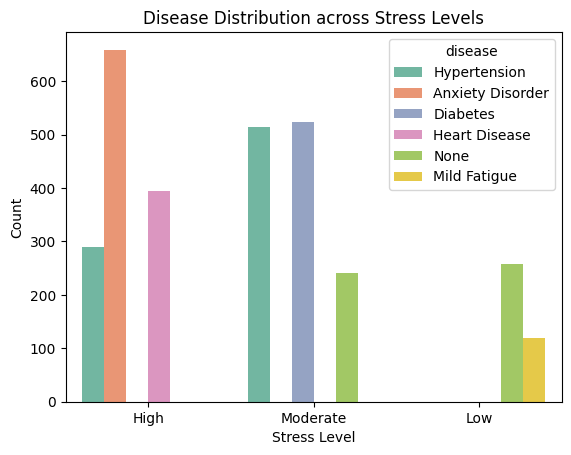

In [52]:
sns.countplot(data=df, x='stress_level', hue='disease', palette='Set2')
plt.title("Disease Distribution across Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()


In [53]:
df_encoded = pd.get_dummies(df, columns=['disease'])
correlation = df_encoded.corr(numeric_only=True)['PSS_score'].sort_values(ascending=False)
correlation




PSS_score                   1.000000
disease_Anxiety Disorder    0.502268
disease_Heart Disease       0.376430
num_sms                     0.035045
day                         0.022056
skin_conductance            0.016004
Neuroticism                 0.015813
Conscientiousness           0.011215
Extraversion                0.010655
mobility_radius             0.008731
Openness                    0.007923
call_duration               0.006049
accelerometer               0.004656
screen_on_time              0.004377
Agreeableness              -0.003250
wake_time                  -0.004925
disease_Hypertension       -0.007391
participant_id             -0.012926
sleep_duration             -0.014899
sleep_time                 -0.018059
PSQI_score                 -0.021299
num_calls                  -0.028919
mobility_distance          -0.034954
disease_Diabetes           -0.254412
disease_Mild Fatigue       -0.311624
disease_None               -0.467692
Name: PSS_score, dtype: float64

In [54]:
df_clean = df.dropna()


In [55]:
print(df.isnull().sum())


participant_id       0
day                  0
PSS_score            0
Openness             0
Conscientiousness    0
Extraversion         0
Agreeableness        0
Neuroticism          0
sleep_time           0
wake_time            0
sleep_duration       0
PSQI_score           0
call_duration        0
num_calls            0
num_sms              0
screen_on_time       0
skin_conductance     0
accelerometer        0
mobility_radius      0
mobility_distance    0
stress_level         0
health_risk          0
disease              0
dtype: int64


In [56]:
# Check for missing values
df.isnull().sum()[df.isnull().sum() > 0]


Series([], dtype: int64)

In [57]:
df = df.dropna(subset=['disease'])


In [58]:
#getting the sum of nul values and rmoving it

In [59]:
df.isnull().sum()

participant_id       0
day                  0
PSS_score            0
Openness             0
Conscientiousness    0
Extraversion         0
Agreeableness        0
Neuroticism          0
sleep_time           0
wake_time            0
sleep_duration       0
PSQI_score           0
call_duration        0
num_calls            0
num_sms              0
screen_on_time       0
skin_conductance     0
accelerometer        0
mobility_radius      0
mobility_distance    0
stress_level         0
health_risk          0
disease              0
dtype: int64

In [60]:
X = df.drop(['participant_id', 'disease'], axis=1)
X = pd.get_dummies(X)
y = df['disease']

In [61]:
# Check for NaNs in features (X)
X.isnull().sum()[X.isnull().sum() > 0]


Series([], dtype: int64)

In [62]:
X.fillna(X.median(numeric_only=True), inplace=True)
for col in X.select_dtypes(include='object').columns:
    X[col].fillna(X[col].mode()[0], inplace=True)



In [63]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

Anxiety Disorder       0.49      0.89      0.63       129
        Diabetes       0.40      0.49      0.44       105
   Heart Disease       0.30      0.10      0.15        80
    Hypertension       0.35      0.29      0.32       160
    Mild Fatigue       0.00      0.00      0.00        31
            None       0.57      0.45      0.50        95

        accuracy                           0.44       600
       macro avg       0.35      0.37      0.34       600
    weighted avg       0.40      0.44      0.40       600



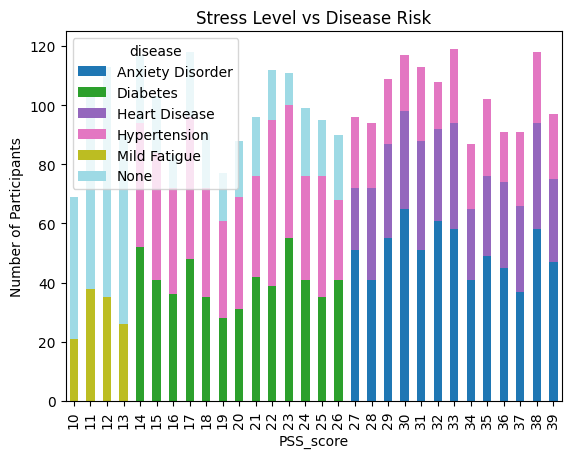

In [65]:
risk_map = df.groupby('PSS_score')['disease'].value_counts().unstack().fillna(0)
risk_map.plot(kind='bar', stacked=True, colormap='tab20')
plt.title("Stress Level vs Disease Risk")
plt.ylabel("Number of Participants")
plt.show()


In [66]:
import numpy as np
import pandas as pd

# creating stress_level column based on PSS_score
df['stress_level'] = pd.cut(df['PSS_score'],
                            bins=[0, 13, 26, 40],
                            labels=['Low', 'Moderate', 'High'])


In [67]:
def assign_disease(row):
    if row['stress_level'] == 'Low':
        return np.random.choice(['None', 'Mild Fatigue', 'None'], p=[0.5, 0.3, 0.2])
    elif row['stress_level'] == 'Moderate':
        return np.random.choice(['Hypertension', 'Diabetes', 'None'], p=[0.4, 0.4, 0.2])
    else:  # High stress
        return np.random.choice(['Anxiety Disorder', 'Heart Disease', 'Hypertension'], p=[0.5, 0.3, 0.2])

df['disease'] = df.apply(assign_disease, axis=1)


df[['stress_level', 'disease']].head(10)


,stress_level,disease
0,High,Heart Disease
1,High,Hypertension
2,High,Anxiety Disorder
3,Moderate,Hypertension
4,High,Hypertension
5,High,Anxiety Disorder
6,High,Anxiety Disorder
7,Moderate,None
8,Moderate,Hypertension
9,Moderate,None


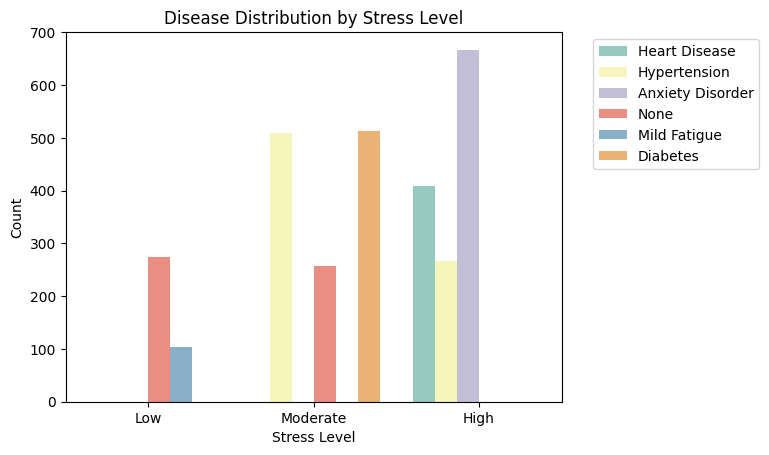

In [68]:
sns.countplot(data=df, x='stress_level', hue='disease', palette='Set3')
plt.title("Disease Distribution by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


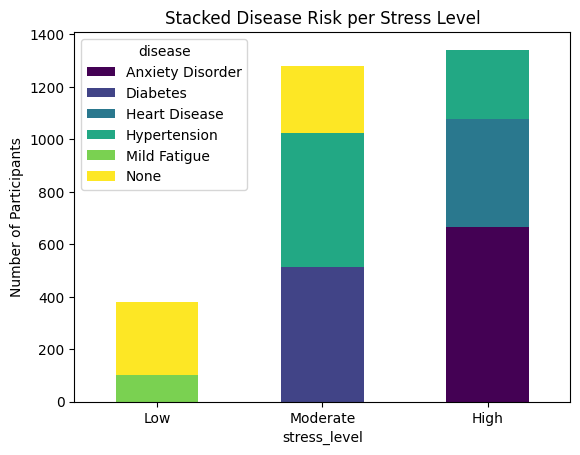

In [69]:
#Health issues across stress
risk_map = df.groupby('stress_level')['disease'].value_counts().unstack().fillna(0)
risk_map.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Stacked Disease Risk per Stress Level")
plt.ylabel("Number of Participants")
plt.xticks(rotation=0)
plt.show()


Predict Disease based on Stress and behavior

In [70]:
X = df.drop(['participant_id', 'PSS_score', 'day', 'disease'], axis=1)
X = pd.get_dummies(X)  
y = df['disease'] 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_disease = RandomForestClassifier()
model_disease.fit(X_train, y_train)

y_pred_disease = model_disease.predict(X_test)

print("Disease Prediction Accuracy:", accuracy_score(y_test, y_pred_disease))
print("\nDisease Prediction Report:\n", classification_report(y_test, y_pred_disease))

Disease Prediction Accuracy: 0.4683333333333333

Disease Prediction Report:
                   precision    recall  f1-score   support

Anxiety Disorder       0.45      0.89      0.60       122
        Diabetes       0.40      0.72      0.51        88
   Heart Disease       0.24      0.07      0.11        97
    Hypertension       0.53      0.28      0.37       171
    Mild Fatigue       0.00      0.00      0.00        20
            None       0.68      0.54      0.60       102

        accuracy                           0.47       600
       macro avg       0.38      0.42      0.36       600
    weighted avg       0.45      0.47      0.42       600



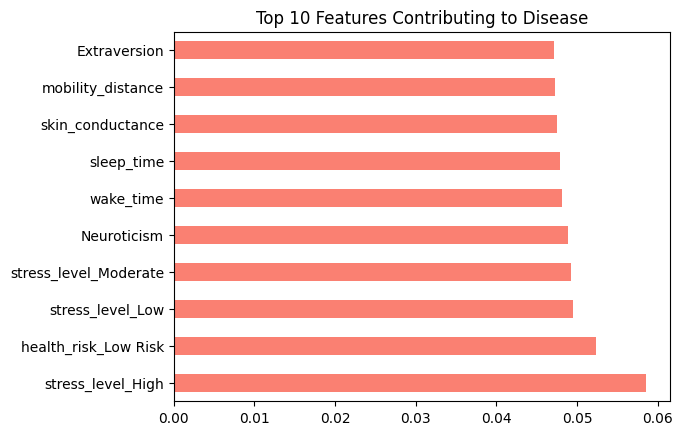

In [72]:
#predictors of disease
importances = pd.Series(model_disease.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='salmon')
plt.title("Top 10 Features Contributing to Disease")
plt.show()


In [73]:
"""The Project detects
1)Stress level (Low / Moderate / High)
2)Causes (sleep, screen time, personality)
3)Health risk levels 
4)Predicted disease due to stress (e.g., Heart disease, Anxiety)
5)Uses classification, correlation, visualization, and  disease prediction
6)model trained here  is RandomForestClassifier"""

'The Project detects\n1)Stress level (Low / Moderate / High)\n2)Causes (sleep, screen time, personality)\n3)Health risk levels \n4)Predicted disease due to stress (e.g., Heart disease, Anxiety)\n5)Uses classification, correlation, visualization, and  disease prediction\n6)model trained here  is RandomForestClassifier'

In [78]:
# ============================================================
# ✅ TRAIN AND SAVE CLEAN STRESS MODEL
# ============================================================
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Drop the columns that should NOT be used as input
X = df.drop(['participant_id', 'day', 'PSS_score', 'stress_level'], axis=1)
X = pd.get_dummies(X)
y = df['stress_level']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save clean model + correct feature list
joblib.dump(model, "stress_model.pkl")
joblib.dump(X.columns.tolist(), "model_features.pkl")

print("✅ Retrained and saved clean stress model (no PSS_score, day)")


✅ Retrained and saved clean stress model (no PSS_score, day)


In [83]:
# ============================================================
# ✅ TRAIN AND SAVE STRESS & DISEASE MODELS
# ============================================================
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# ============================================================
# ✅ LOAD DATASET
# ============================================================
df = pd.read_csv("stress_detection.csv")  # change name if needed

# ============================================================
# ✅ CREATE STRESS LEVEL COLUMN
# ============================================================
def stress_category(score):
    if score <= 13:
        return 'Low'
    elif 14 <= score <= 26:
        return 'Moderate'
    else:
        return 'High'

df['stress_level'] = df['PSS_score'].apply(stress_category)

print("Stress level distribution:\n", df['stress_level'].value_counts())

# ============================================================
# ✅ CREATE SYNTHETIC DISEASE COLUMN (BASED ON STRESS LEVEL)
# ============================================================
def assign_disease(row):
    if row['stress_level'] == 'Low':
        return np.random.choice(['None', 'Mild Fatigue'], p=[0.7, 0.3])
    elif row['stress_level'] == 'Moderate':
        return np.random.choice(['Hypertension', 'Diabetes', 'None'], p=[0.4, 0.4, 0.2])
    else:  # High stress
        return np.random.choice(['Anxiety Disorder', 'Heart Disease', 'Hypertension'], p=[0.5, 0.3, 0.2])

df['disease'] = df.apply(assign_disease, axis=1)

print("\nDisease sample:\n", df[['stress_level', 'disease']].head())

# ============================================================
# ✅ TRAIN STRESS MODEL
# ============================================================
X = df.drop(['participant_id', 'day', 'PSS_score', 'stress_level'], axis=1)
X = pd.get_dummies(X)
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stress_model = RandomForestClassifier(random_state=42)
stress_model.fit(X_train, y_train)

y_pred = stress_model.predict(X_test)

print("\n🧠 Stress Model Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

# ============================================================
# ✅ TRAIN DISEASE MODEL
# ============================================================
X_disease = df.drop(['participant_id', 'PSS_score', 'day', 'disease'], axis=1)
X_disease = pd.get_dummies(X_disease)
y_disease = df['disease']

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_disease, y_disease, test_size=0.2, random_state=42)

disease_model = RandomForestClassifier(random_state=42)
disease_model.fit(X_train_d, y_train_d)

y_pred_disease = disease_model.predict(X_test_d)

print("\n🩺 Disease Model Results")
print("Accuracy:", accuracy_score(y_test_d, y_pred_disease))
print("\n", classification_report(y_test_d, y_pred_disease))

# ============================================================
# ✅ SAVE MODELS AND FEATURE LIST
# ============================================================
joblib.dump(stress_model, "stress_model.pkl")
joblib.dump(disease_model, "disease_model.pkl")
joblib.dump(X.columns.tolist(), "model_features.pkl")

print("\n✅ Models and feature list saved successfully!")


Stress level distribution:
 stress_level
High        1342
Moderate    1280
Low          378
Name: count, dtype: int64

Disease sample:
   stress_level           disease
0         High      Hypertension
1         High  Anxiety Disorder
2         High  Anxiety Disorder
3     Moderate          Diabetes
4         High     Heart Disease

🧠 Stress Model Results
Accuracy: 0.8216666666666667

               precision    recall  f1-score   support

        High       0.98      0.83      0.90       272
         Low       0.62      0.65      0.63        74
    Moderate       0.75      0.86      0.80       254

    accuracy                           0.82       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.84      0.82      0.83       600


🩺 Disease Model Results
Accuracy: 0.4666666666666667

                   precision    recall  f1-score   support

Anxiety Disorder       0.48      0.80      0.60       137
        Diabetes       0.44      0.48      0.46       104

In [85]:
# ============================================================
# ✅ FINAL TRAINING CODE FOR STRESS & DISEASE MODELS
# ============================================================

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# ============================================================
# ✅ LOAD DATASET
# ============================================================
df = pd.read_csv("stress_detection.csv")  # Change filename if needed

# ============================================================
# ✅ CREATE STRESS LEVEL COLUMN
# ============================================================
def stress_category(score):
    if score <= 13:
        return 'Low'
    elif 14 <= score <= 26:
        return 'Moderate'
    else:
        return 'High'

df['stress_level'] = df['PSS_score'].apply(stress_category)

# ============================================================
# ✅ CREATE DISEASE COLUMN IF NOT PRESENT
# ============================================================
if 'disease' not in df.columns:
    def assign_disease(row):
        if row['stress_level'] == 'Low':
            return np.random.choice(['None', 'Mild Fatigue'], p=[0.7, 0.3])
        elif row['stress_level'] == 'Moderate':
            return np.random.choice(['Hypertension', 'Diabetes', 'None'], p=[0.4, 0.4, 0.2])
        else:
            return np.random.choice(['Anxiety Disorder', 'Heart Disease', 'Hypertension'], p=[0.5, 0.3, 0.2])
    df['disease'] = df.apply(assign_disease, axis=1)

print("✅ Disease column verified/created.")
print(df[['stress_level', 'disease']].head())

# ============================================================
# ✅ TRAIN STRESS MODEL
# ============================================================
X = df.drop(['participant_id', 'day', 'PSS_score', 'stress_level', 'disease'], axis=1)
X = pd.get_dummies(X)
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stress_model = RandomForestClassifier(random_state=42)
stress_model.fit(X_train, y_train)

y_pred = stress_model.predict(X_test)

print("\n🧠 Stress Model Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

# ============================================================
# ✅ TRAIN DISEASE MODEL (NO STRESS LEVEL INCLUDED)
# ============================================================
X_disease = df.drop(['participant_id', 'PSS_score', 'day', 'disease', 'stress_level'], axis=1)
X_disease = pd.get_dummies(X_disease)
y_disease = df['disease']

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_disease, y_disease, test_size=0.2, random_state=42)

disease_model = RandomForestClassifier(random_state=42)
disease_model.fit(X_train_d, y_train_d)

y_pred_disease = disease_model.predict(X_test_d)

print("\n🩺 Disease Model Results")
print("Accuracy:", accuracy_score(y_test_d, y_pred_disease))
print("\n", classification_report(y_test_d, y_pred_disease))

# ============================================================
# ✅ SAVE MODELS AND FEATURE LIST
# ============================================================
joblib.dump(stress_model, "stress_model.pkl")
joblib.dump(disease_model, "disease_model.pkl")
joblib.dump(X.columns.tolist(), "model_features.pkl")

print("\n✅ Models retrained and saved cleanly (no stress_level or day in disease model)!")


✅ Disease column verified/created.
  stress_level           disease
0         High  Anxiety Disorder
1         High  Anxiety Disorder
2         High  Anxiety Disorder
3     Moderate          Diabetes
4         High  Anxiety Disorder

🧠 Stress Model Results
Accuracy: 0.47333333333333333

               precision    recall  f1-score   support

        High       0.48      0.57      0.52       272
         Low       0.00      0.00      0.00        74
    Moderate       0.46      0.51      0.48       254

    accuracy                           0.47       600
   macro avg       0.32      0.36      0.34       600
weighted avg       0.41      0.47      0.44       600


🩺 Disease Model Results
Accuracy: 0.24166666666666667

                   precision    recall  f1-score   support

Anxiety Disorder       0.27      0.40      0.32       154
        Diabetes       0.21      0.07      0.10       102
   Heart Disease       0.22      0.03      0.05        74
    Hypertension       0.25      0.44   

In [1]:
# ============================================================
# ✅ SIMPLIFIED STRESS MODEL (FEW FEATURES)
# ============================================================

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load your cleaned dataset
df = pd.read_csv("stress_detection.csv")

# Create stress_level column if not present
# def stress_category(score):
#     if score <= 13:
#         return 'Low'
#     elif 14 <= score <= 26:
#         return 'Moderate'
#     else:
#         return 'High'

def stress_category(score):
    if score <= 8:
        return 'Very Low'
    elif 9 <= score <= 16:
        return 'Low'
    elif 17 <= score <= 24:
        return 'Moderate'
    elif 25 <= score <= 32:
        return 'High'
    else:
        return 'Very High'

if 'stress_level' not in df.columns:
    df['stress_level'] = df['PSS_score'].apply(stress_category)

# Select only key input features
selected_features = [
    'sleep_duration',
    'screen_on_time',
    'Neuroticism',
    'Conscientiousness',
    'skin_conductance',
    'accelerometer',
    'PSQI_score'
]

X = df[selected_features]
y = df['stress_level']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
simple_stress_model = RandomForestClassifier(random_state=42)
simple_stress_model.fit(X_train, y_train)

# Evaluate
y_pred = simple_stress_model.predict(X_test)
print("Simplified Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

# Save simplified model and feature list
joblib.dump(simple_stress_model, "simple_stress_model.pkl")
joblib.dump(selected_features, "simple_model_features.pkl")

print("✅ Simplified model and features saved successfully!")


Simplified Model Accuracy: 0.2916666666666667

               precision    recall  f1-score   support

        High       0.31      0.39      0.35       175
         Low       0.21      0.16      0.18       132
    Moderate       0.33      0.32      0.32       161
   Very High       0.28      0.26      0.27       132

    accuracy                           0.29       600
   macro avg       0.28      0.28      0.28       600
weighted avg       0.29      0.29      0.29       600

✅ Simplified model and features saved successfully!


In [2]:
# ============================================================
# ✅ BALANCED SIMPLIFIED STRESS MODEL (IMPROVED)
# ============================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import joblib

# Select only key input features
selected_features = [
    'sleep_duration',
    'screen_on_time',
    'Neuroticism',
    'Conscientiousness',
    'skin_conductance',
    'accelerometer',
    'PSQI_score'
]

X = df[selected_features]
y = df['stress_level']

# Compute balanced class weights automatically
classes = np.unique(y)
weights = compute_class_weight('balanced', classes=classes, y=y)
class_weights = dict(zip(classes, weights))
print("🧮 Class Weights:", class_weights)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train with class weights
simple_stress_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    random_state=42,
    class_weight=class_weights
)
simple_stress_model.fit(X_train, y_train)

# Evaluate
y_pred = simple_stress_model.predict(X_test)
print("\nSimplified Balanced Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

# Save model and features
joblib.dump(simple_stress_model, "simple_stress_model.pkl")
joblib.dump(selected_features, "simple_model_features.pkl")

print("\n✅ Balanced simplified model retrained and saved!")


🧮 Class Weights: {'High': np.float64(0.9124087591240876), 'Low': np.float64(1.1013215859030836), 'Moderate': np.float64(0.946969696969697), 'Very High': np.float64(1.0638297872340425)}

Simplified Balanced Model Accuracy: 0.235

               precision    recall  f1-score   support

        High       0.24      0.26      0.25       165
         Low       0.26      0.24      0.25       136
    Moderate       0.22      0.24      0.23       158
   Very High       0.21      0.20      0.20       141

    accuracy                           0.23       600
   macro avg       0.24      0.23      0.23       600
weighted avg       0.24      0.23      0.23       600


✅ Balanced simplified model retrained and saved!


In [3]:
from collections import Counter
preds = simple_stress_model.predict(X_test)
print("Prediction distribution:", Counter(preds))


Prediction distribution: Counter({'High': 176, 'Moderate': 169, 'Very High': 134, 'Low': 121})


In [4]:
from sklearn.calibration import CalibratedClassifierCV

cal_model = CalibratedClassifierCV(simple_stress_model, cv=3)
cal_model.fit(X_train, y_train)
joblib.dump(cal_model, "simple_stress_model.pkl")


['simple_stress_model.pkl']

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Keep the same selected features
selected_features = [
    'sleep_duration',
    'screen_on_time',
    'Neuroticism',
    'Conscientiousness',
    'skin_conductance',
    'accelerometer',
    'PSQI_score'
]

X = df[selected_features]
y = df['stress_level']

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Gradient Boosting with scaling
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=4)
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

joblib.dump(model, "simple_stress_model.pkl")
joblib.dump(selected_features, "simple_model_features.pkl")

print("✅ Gradient Boosting model retrained and saved successfully!")


Model Accuracy: 0.275

               precision    recall  f1-score   support

        High       0.32      0.37      0.34       165
         Low       0.23      0.19      0.21       136
    Moderate       0.28      0.34      0.31       158
   Very High       0.23      0.18      0.20       141

    accuracy                           0.28       600
   macro avg       0.27      0.27      0.26       600
weighted avg       0.27      0.28      0.27       600

✅ Gradient Boosting model retrained and saved successfully!
